# 统计方法

### 假设检验

假设检验是统计推断中的一个重要内容，它是利用样本数据对某个实现作出的统计假设按照某种设计好的方法进行检验，判断次假设是否正确。

- 基本思想：反证法，为了检验一个“假设”是否成立，先假定这个假设是成立的，却导致一个不合理现象的出现，那么原先的假定不正确。
- 两类错误：（1）否定真实的原假设（2）接收错误的原假设。
- 在教科书中，用拒绝域来否定H0来决定，在计算机软件中计算第一类错误的概率（P值）来决定。当犯第一类错误的概率（P值）足够小时，说明否定真实的原假设基本不发生，原假设是不正确的，即拒绝原假设。

假设检验方法通常分为两类：

- 参数性假设检验，即已知总体分布时通过样本检验关于位置参数的某个假设，比如正态总体均值及方差的假设检验
- 非参数检验，即总体分布未知时的检验问题

重要的参数有：t检验，F检验等，仅仅挑出t检验说明R语言所提供的检验函数是怎么样的。

对于单正态总体，方差未知，检验均值则使用：t检验

函数：

```
t.test(x,y=NULL,

    alternative=c("two.sided","less","greater"),

    mu=0,paired=FALSE,var.equal=FALSE,

    conf.level=0.95)

```

其中x,y是又数据构成e向量，（如果只提供x,则作单个正态总体的均值检验，如果提供x,y则作两个总体的均值检验)，alternative表示被则假设，two.sided(缺省)，双边检验(H1:μ≠H0)，less表示单边检验(H1:μ<μ0),greater表示单边检验(H1:μ>μ0)，mu表示原假设μ0，conf.level置信水平，即1-α，通常是0.95，var.equal是逻辑变量，var.equal=TRUE表示两样品方差相同，var.equal=FALSE（缺省）表示两样本方差不同。

例子：
某种原件的寿命X（以小时计）服从正态分布N（μ, σ)其中μ, σ2均未知。现测得16只元件的寿命如下：

                 159 280 101 212 224 379 179 264
                  222 362 168 250 149 260 485 170

问是否有理由认为元件的平均寿命大于255小时？

In [2]:
X<-c(159, 280, 101, 212, 224, 379, 179, 264,
        222, 362, 168, 250, 149, 260, 485, 170)
t.test(X,alternative = "greater",mu=225)


	One Sample t-test

data:  X
t = 0.66852, df = 15, p-value = 0.257
alternative hypothesis: true mean is greater than 225
95 percent confidence interval:
 198.2321      Inf
sample estimates:
mean of x 
    241.5 


可见P值为0.257 > 0.05 ，不能拒绝原假设，接受H0，即平均寿命不大于225小时。

### 回归分析

回归分析是一种非常广泛使用的统计工具，用于建立两个或者多个变量之间的关系模型，比如是否相关、相关方向与强度等等。 这些变量之一称为预测变量，其值通过实验收集。另一个变量称为响应变量，其值从预测变量派生。回归分析有许多模型，此处了解简单的线性回归模型，看看其在R中是怎么样的。

对于线性回归模型，我们需要考虑：
- 模型
- 回归参数的估计
- 回归系数的显著性检验
- 回归方程的显著性检验
- 相关性检验

线性回归函数：

```
lm(formula, data, subset, weights, na.action,

  method = "qr", model = TRUE, x = FALSE, y = FALSE, qr = TRUE,

  singular.ok = TRUE, contrasts = NULL, offset, ...)
```
该函数能完成线性回归的估计和检验工作，以下是所使用的参数的说明

- formula是表示x和y之间的关系的符号。

- data是应用公式的向量。


回归的简单例子是当人的身高已知时预测人的体重。 为了做到这一点，我们需要有一个人的身高和体重之间的关系。

创建关系的步骤是：

- 进行收集高度和相应重量的观测值的样本的实验。

- 使用R语言中的lm()函数创建关系模型。

- 从创建的模型中找到系数，并使用这些创建数学方程

- 获得关系模型的摘要以了解预测中的平均误差。 也称为残差。

- 为了预测新人的体重，使用R中的predict()函数

预测函数：
```
predict(object, newdata)
```

以下是所使用的参数的描述

- object是已使用lm()函数创建的公式。

- newdata是包含预测变量的新值的向量。

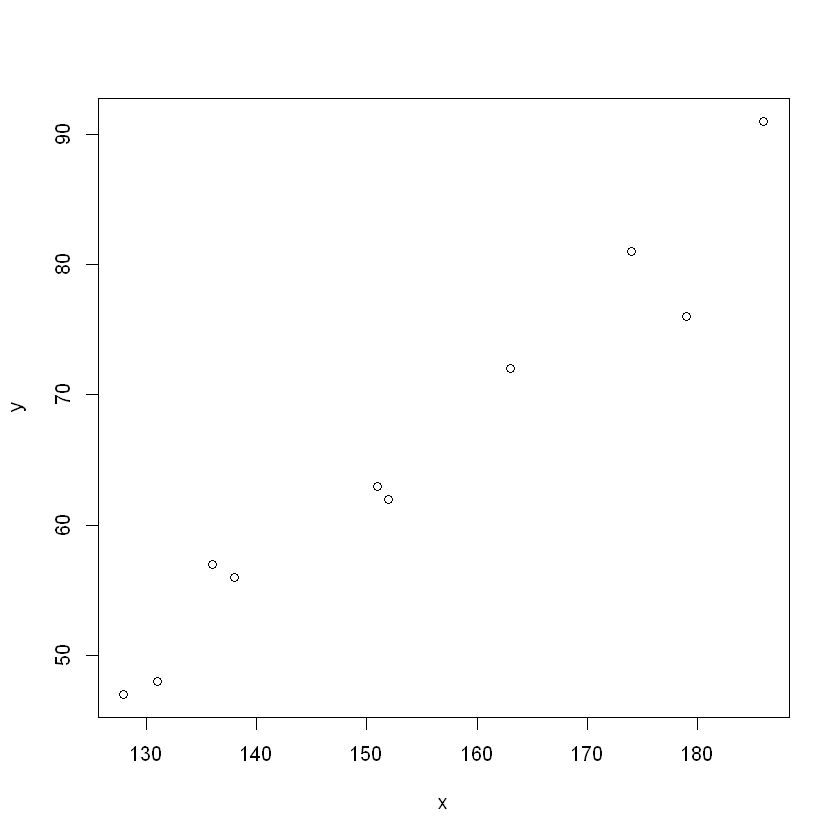

In [3]:
x <- c(151, 174, 138, 186, 128, 136, 179, 163, 152, 131)
y <- c(63, 81, 56, 91, 47, 57, 76, 72, 62, 48)

plot(x,y)

In [4]:
# Apply the lm() function.
relation <- lm(y~x)

print(summary(relation))


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3002 -1.6629  0.0412  1.8944  3.9775 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -38.45509    8.04901  -4.778  0.00139 ** 
x             0.67461    0.05191  12.997 1.16e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.253 on 8 degrees of freedom
Multiple R-squared:  0.9548,	Adjusted R-squared:  0.9491 
F-statistic: 168.9 on 1 and 8 DF,  p-value: 1.164e-06



In [5]:
# The predictor vector.
x <- c(151, 174, 138, 186, 128, 136, 179, 163, 152, 131)

# The resposne vector.
y <- c(63, 81, 56, 91, 47, 57, 76, 72, 62, 48)

# Apply the lm() function.
relation <- lm(y~x)

# Find weight of a person with height 170.
a <- data.frame(x = 170)
result <-  predict(relation,a)
print(result)

       1 
76.22869 


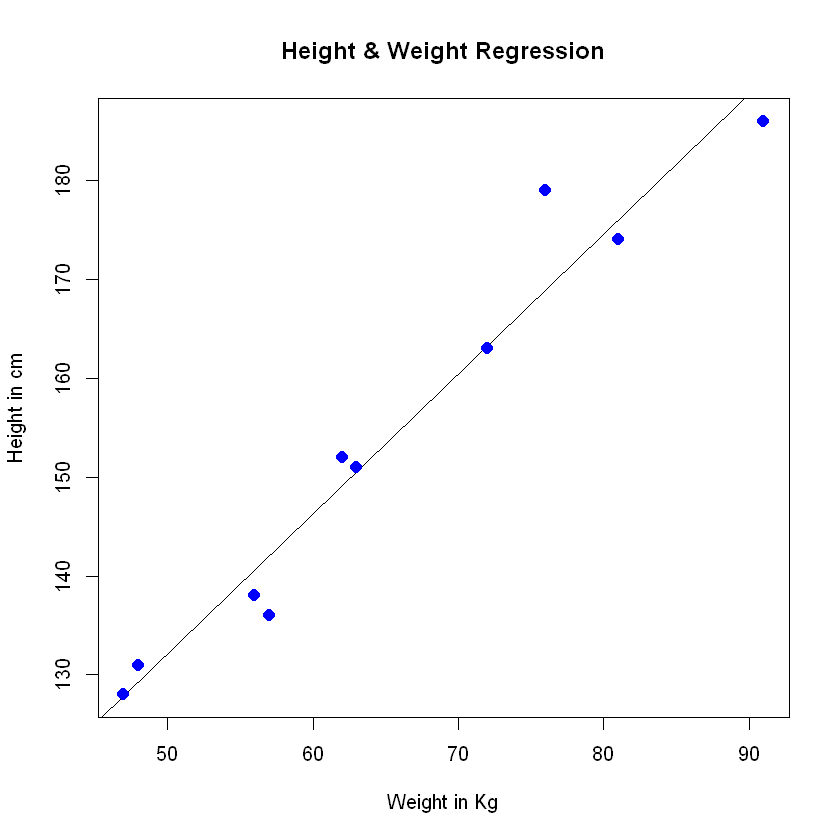

In [6]:
# Create the predictor and response variable.
x <- c(151, 174, 138, 186, 128, 136, 179, 163, 152, 131)
y <- c(63, 81, 56, 91, 47, 57, 76, 72, 62, 48)
relation <- lm(y~x)

# Plot the chart.
plot(y,x,col = "blue",main = "Height & Weight Regression",
abline(lm(x~y)),cex = 1.3,pch = 16,xlab = "Weight in Kg",ylab = "Height in cm")


### 模拟

在统计分析中，随机模拟是统计研究的重要方法， 另外许多现代统计计算方法（如MCMC）也是基于随机模拟的。 R中提供了多种不同概率分布的随机数函数， 可以批量地产生随机数。 一些R扩展包利用了随机模拟方法，如boot包进行bootstrap估计。主要讲：

- 随机数
- 随机抽样
- 随机模拟

所谓随机数，实际是“伪随机数”， 是从一组起始值（称为种子）， 按照某种递推算法向前递推得到的。 所以，从同一种子出发，得到的随机数序列是相同的。

为了得到可重现的结果， 随机模拟应该从固定不变的种子开始模拟。 用set.seed(k)指定一个编号为k的种子， 这样每次从编号k种子运行相同的模拟程序可以得到相同的结果。

R提供了多种分布的随机数函数，如runif(n)产生n个标准均匀分布随机数， rnorm(n)产生n个标准正态分布随机数。


In [7]:
round(runif(5), 2)

round(rnorm(5), 2)

[1] 0.86 0.93 0.67 0.00 0.06

[1]  1.61  0.64 -1.34  0.04 -0.36

用R中的随机抽样函数，可以模拟统计中的抽样过程，分为：

- 抽样，`sample()`函数
- Bootstrap方法


In [8]:
# sample()的选项size指定抽样个数， prob指定每个值的概率， replace=TRUE说明是有放回抽样。

sample(c('正面', '反面'), size=10, prob=c(0.7, 0.3), replace=TRUE)

[1] "正面" "正面" "正面" "正面" "正面" "反面" "正面" "正面" "反面" "正面"

以下尝试一个随机模拟的例子，考虑如下线性回归模型

![](./images/随机模拟示例.png)

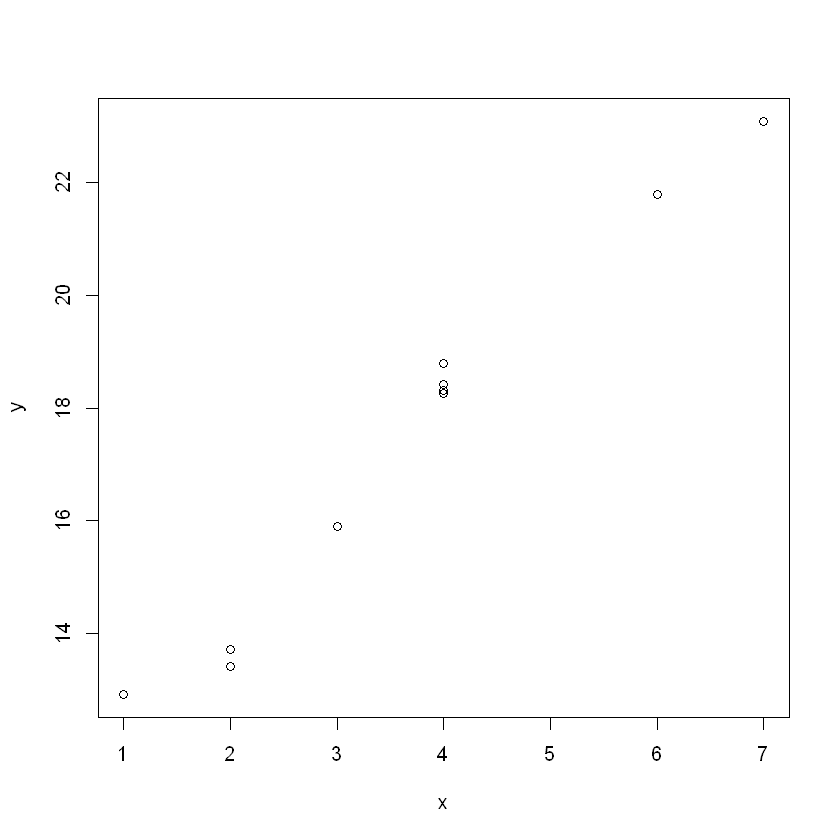

In [9]:
n <- 10; a <- 10; b <- 2
x <- sample(1:10, size=n, replace=TRUE)
eps <- rnorm(n, 0, 0.5)
y <- a + b * x + eps

plot(x,y)

In [10]:
lm(y ~ x)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
     10.532        1.873  


In [11]:
summary(lm(y ~ x)) # 返回一个矩阵， 包括a,b的估计值、标准误差、t检验统计量、检验p值


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8721 -0.4788  0.1355  0.3732  0.7747 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.5316     0.4251   24.78 7.53e-09 ***
x             1.8732     0.1040   18.01 9.27e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5707 on 8 degrees of freedom
Multiple R-squared:  0.9759,	Adjusted R-squared:  0.9729 
F-statistic: 324.3 on 1 and 8 DF,  p-value: 9.272e-08


In [12]:
c(summary(lm(y ~ x))$coefficients[,1:2]) # 相应的估计值以及标准差

[1] 10.5315611  1.8731940  0.4250557  0.1040130

用replicate(, 复合语句)执行多次模拟， 返回向量或矩阵结果， 返回矩阵时，每列是一次模拟的结果。 下面是线性回归整个模拟程序，写成了一个函数。

In [13]:
reg.sim <- function(
  a=10, b=2, sigma=0.5, 
  n=10, B=1000){
  set.seed(1)
  resm <- replicate(B, {
      x <- sample(1:10, size=n, replace=TRUE)
      eps <- rnorm(n, 0, 0.5)
      y <- a + b * x + eps
      c(summary(lm(y ~ x))$coefficients[,1:2])
  })
  resm <- t(resm)
  colnames(resm) <- c('a', 'b', 'SE.a', 'SE.b')
  cat(B, '次模拟的平均值:\n')
  print( apply(resm, 2, mean) )
  cat(B, '次模拟的标准差:\n')
  print( apply(resm, 2, sd) )
}

set.seed(1)
reg.sim()

1000 次模拟的平均值:
         a          b       SE.a       SE.b 
9.99624063 1.99889264 0.36333861 0.05948963 
1000 次模拟的标准差:
         a          b       SE.a       SE.b 
0.39281551 0.06369336 0.12802849 0.01945043 
